<a href="https://colab.research.google.com/github/Raphaeldavid203/Quantatria/blob/main/Predicting_Cocoa_Prices_Using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Cocoa Prices Using Linear Regression**

In this notebook, we will explore the use of linear regression to predict future cocoa prices. Cocoa, like many other commodities, can be influenced by various market factors. By using historical price data and calculating simple moving averages (SMAs), we aim to create a model that can forecast the price of cocoa for the next day. We will evaluate the model's performance and even backtest a simple trading strategy based on the predictions.

Obviously, our code here is very simple and will need other variables, so this is just an introduction to Linear Regression.





---


Let's start by downloading historical data for cocoa prices from Yahoo Finance. We will then calculate two moving averages: a 10-day SMA and a 30-day SMA. These moving averages will serve as our explanatory variables for the linear regression model.


In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import yfinance as yf

# Download cocoa price data
data = yf.download('CC=F', start='2014-08-23', end='2024-08-23')

# Calculate moving averages
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['SMA_30'] = data['Close'].rolling(window=30).mean()

# Drop missing values
data = data.dropna()

# Prepare the features and target variable
X = data[['SMA_10', 'SMA_30']]
y = data['Close'].shift(-1)  # Predict the next day's price

# Remove rows with missing target values
X = X[:-1]
y = y[:-1]

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]



[*********************100%%**********************]  1 of 1 completed


Now that our data is prepared, we will train a linear regression model. This model will attempt to predict the next day's cocoa price based on the 10-day and 30-day SMAs.

In [5]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Let's evaluate the model by predicting the prices on the test data and calculating the Root Mean Squared Error (RMSE). The RMSE is a common metric used to measure the accuracy of a regression model, with lower values indicating better performance.

In [6]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Display the model coefficients
print(f"Coefficients: {model.coef_}")


RMSE: 453.3733446544695
Coefficients: [ 1.16852478 -0.19782476]


We can see from the output that the Root Mean Squared Error (RMSE) is approximately 453.37. This value represents the average deviation of the predicted cocoa prices from the actual prices in the test dataset, indicating the typical error made by the model in its predictions. Additionally, the coefficients displayed, 1.1685 for the 10-day SMA and -0.1978 for the 30-day SMA, suggest that the model gives more weight to the 10-day SMA, positively influencing the predicted price, while the 30-day SMA has a slight negative impact. These coefficients quantify the relationship between the moving averages and the predicted price, with the 10-day SMA being a stronger predictor according to this model.

We will now visualise the predicted prices against the actual prices to better understand how well the model performs. Additionally, we will plot the residuals (the differences between the actual and predicted prices) to identify any patterns that the model may have missed.

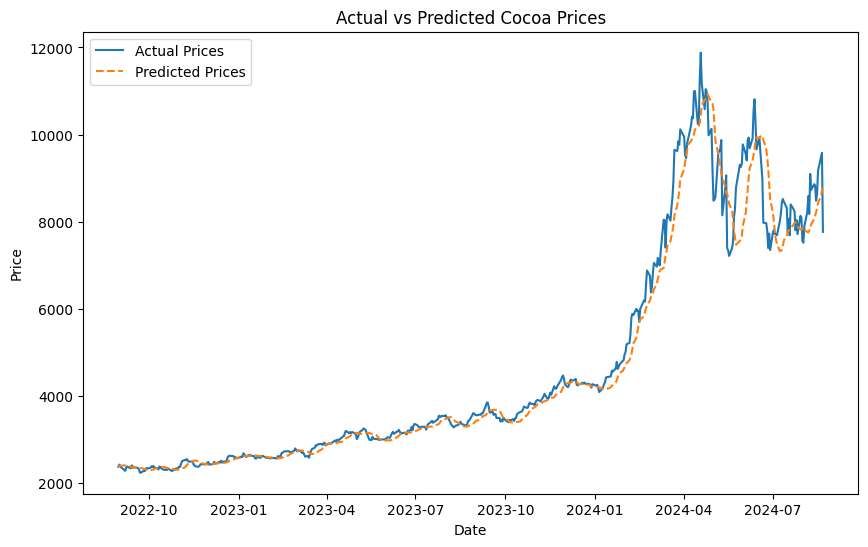

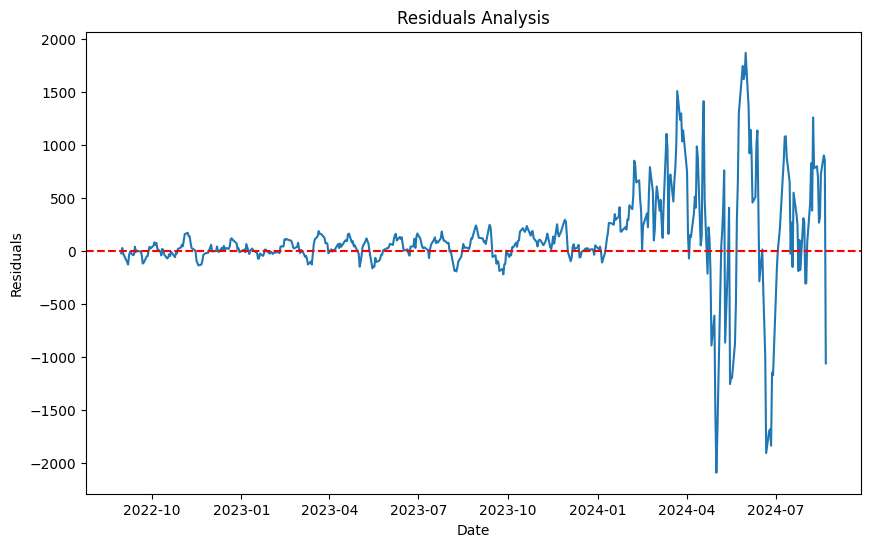

In [8]:
import matplotlib.pyplot as plt

# Plot the predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, y_pred, label='Predicted Prices', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Cocoa Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Plot the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Analysis')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()


The graph titled "Actual vs Predicted Cocoa Prices" shows how well the model's predictions match the actual cocoa prices over time. Overall, the model tracks the general trend of the actual prices, indicating that it captures the broader movements in the market.

However, there is a noticeable lag in the model's predictions, especially during sharp price changes. The predicted prices tend to follow the actual prices with some delay, suggesting the model isn't responding quickly enough to sudden market shifts.

Around 2024, the model's predictions start to diverge more significantly from the actual prices, particularly at the peaks and troughs. This divergence indicates that the model struggled during periods of increased volatility, leading to less accurate predictions.



The "Residuals Analysis" graph shows the differences between the actual and predicted prices over time. Ideally, these residuals should be randomly scattered around zero, indicating that the model's errors are evenly distributed.

In the early period (2022-10 to 2023-04), the residuals are relatively stable and close to zero, suggesting that the model was making consistent predictions. However, from 2023-04 onwards, the residuals become more volatile, with larger deviations from zero. This increase in volatility indicates that the model's accuracy decreased over time, particularly in the later months.

The pattern of increasing residuals, especially during recent periods, suggests that the model might be missing some key dynamics in the data, leading to systematic errors in its predictions.

Let's use the trained model to predict the price of cocoa for the next day. We will also extend this to predict prices for the next five days.

In [9]:
# Get the latest moving averages
latest_sma_10 = data['SMA_10'].iloc[-1]
latest_sma_30 = data['SMA_30'].iloc[-1]

# Create a DataFrame for future predictions
future_data = pd.DataFrame({
    'SMA_10': [latest_sma_10],
    'SMA_30': [latest_sma_30]
})

# Predict the next day's price
future_price = model.predict(future_data)
print(f"Predicted cocoa price for the next day: {future_price[0]}")

# Predict for multiple days ahead
days_ahead = 5
predicted_prices = []

for i in range(days_ahead):
    latest_sma_10 = data['Close'].rolling(window=10).mean().iloc[-1]
    latest_sma_30 = data['Close'].rolling(window=30).mean().iloc[-1]

    future_data = pd.DataFrame({
        'SMA_10': [latest_sma_10],
        'SMA_30': [latest_sma_30]
    })

    future_price = model.predict(future_data)
    predicted_prices.append(future_price[0])

    # Update the data with the predicted price
    new_row = pd.DataFrame({'Close': [future_price[0]], 'SMA_10': [latest_sma_10], 'SMA_30': [latest_sma_30]})
    data = pd.concat([data, new_row], ignore_index=True)

print(f"Predicted prices for the next {days_ahead} days: {predicted_prices}")


Predicted cocoa price for the next day: 8783.089288757958
Predicted prices for the next 5 days: [8783.089288757958, 8744.57612174294, 8744.305767599706, 8727.754965348739, 8709.095074966228]


We will now backtest a simple trading strategy based on our model's predictions. The strategy is straightforward: buy if the model predicts a price increase, and sell if it predicts a price decrease.

Date: 2022-09-01 00:00:00, Action: Hold, Portfolio Value: 100.0
Date: 2022-09-02 00:00:00, Action: Buy, Portfolio Value: 100.0
Date: 2022-09-06 00:00:00, Action: Hold, Portfolio Value: 96.85270667226185
Date: 2022-09-07 00:00:00, Action: Hold, Portfolio Value: 95.92950062945866
Date: 2022-09-08 00:00:00, Action: Hold, Portfolio Value: 99.0348300461603
Date: 2022-09-09 00:00:00, Action: Hold, Portfolio Value: 100.12589173310953
Date: 2022-09-12 00:00:00, Action: Hold, Portfolio Value: 98.61519093579521
Date: 2022-09-13 00:00:00, Action: Hold, Portfolio Value: 98.48929920268569
Date: 2022-09-14 00:00:00, Action: Sell, Portfolio Value: 101.21695342005874
Date: 2022-09-15 00:00:00, Action: Buy, Portfolio Value: 101.21695342005874
Date: 2022-09-16 00:00:00, Action: Sell, Portfolio Value: 101.60295027632168
Date: 2022-09-19 00:00:00, Action: Buy, Portfolio Value: 101.60295027632168
Date: 2022-09-20 00:00:00, Action: Hold, Portfolio Value: 101.47351976641554
Date: 2022-09-21 00:00:00, Action:

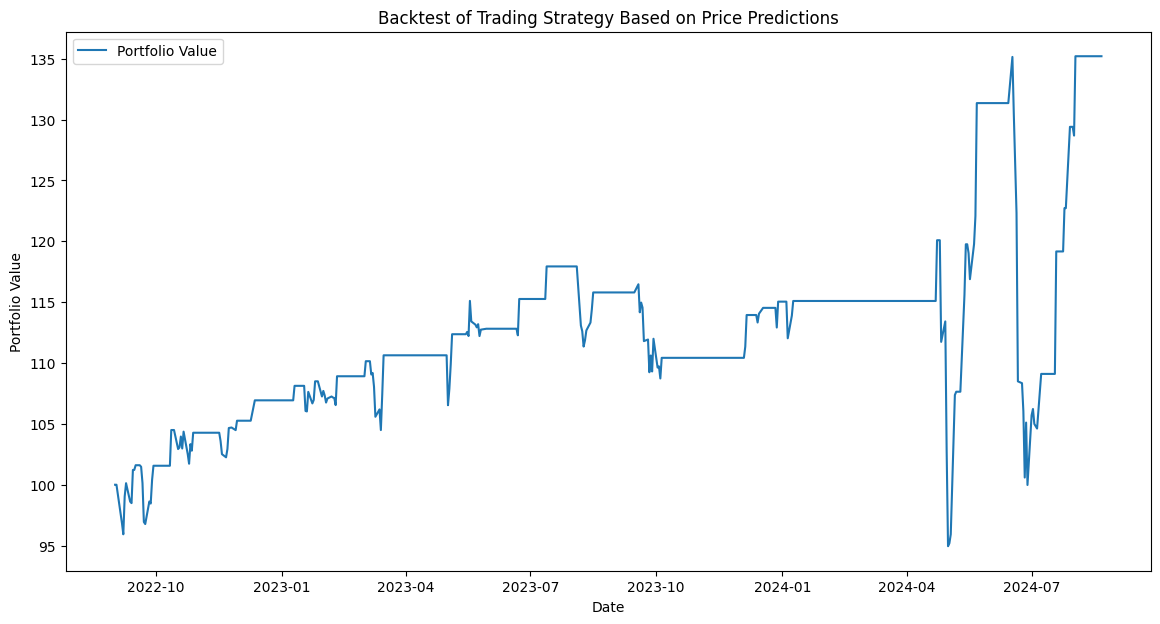

In [10]:
# Initialise trading variables
initial_cash = 100  # Starting amount
cash = initial_cash
position = 0  # Current position (0 = no position, 1 = long position)
n_trades = 0  # Number of trades

# Store the portfolio performance
performance = []

for i in range(1, len(y_test)):
    # Predict the next day's price
    predicted_price = y_pred[i-1]
    actual_price = y_test.iloc[i]

    # Simple trading rule: buy if predicted price is higher than the actual price, sell if lower
    if predicted_price > actual_price and position == 0:
        position = cash / actual_price
        cash = 0
        n_trades += 1
        trade_action = 'Buy'
    elif predicted_price < actual_price and position > 0:
        cash = position * actual_price
        position = 0
        n_trades += 1
        trade_action = 'Sell'
    else:
        trade_action = 'Hold'

    # Update the portfolio value
    portfolio_value = cash + (position * actual_price)
    performance.append(portfolio_value)

    print(f"Date: {y_test.index[i]}, Action: {trade_action}, Portfolio Value: {portfolio_value}")

# Display backtest results
final_portfolio_value = cash + (position * y_test.iloc[-1])
total_return = (final_portfolio_value - initial_cash) / initial_cash * 100
print(f"Final Portfolio Value: {final_portfolio_value}")
print(f"Total Return: {total_return:.2f}%")
print(f"Number of Trades: {n_trades}")

# Visualize portfolio performance
plt.figure(figsize=(14, 7))
plt.plot(y_test.index[1:], performance, label='Portfolio Value')
plt.title('Backtest of Trading Strategy Based on Price Predictions')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()


We can see that the backtest is positive, but the strategy is too volatile and not precise enough, given that it relies solely on moving averages. However, this project serves as an important foundation for building a more robust trading model by incorporating other variables and techniques to enhance accuracy and stability.